# Installing PRAW: A Guide to Accessing Reddit's API

In [96]:
!pip install praw


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Reddit API Authentication


In [97]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="zC10-OcQWeZW-JaslA5glA",
    client_secret="pW5xIkxi2QcTspWUNmr_NJhAeb8m7A",
    user_agent=user_agent
)

# Import Necessary libraries

In [98]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [82]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'our', 'it', 'has', 'myself', 'as', 'himself', "doesn't", 'further', 'an', 'had', 'me', 'very', 'her', 'its', 'not', 'these', 'but', 'before', 'shouldn', "don't", 'a', 'that', 'out', 'why', 'won', "shouldn't", 'was', 'can', 'needn', 'ourselves', 'itself', 'ours', 'through', 'couldn', 'how', 'am', 'm', 'have', 'what', 'with', 'off', 'they', 'for', 'his', "it's", 'at', "weren't", "didn't", 'does', 'doesn', 'too', 'under', 'whom', 'there', "mightn't", 'some', 'is', 'who', 'when', 'against', 'we', 'on', 'no', "shan't", 'most', 'about', 'own', 'them', 'your', 'where', 'so', 'hasn', "isn't", "needn't", 'their', 'just', 'aren', 'here', 'themselves', 'be', 'him', 'yourselves', "couldn't", 'she', 'again', 'nor', 't', 'been', 'theirs', 'any', 'between', 'more', 'now', 'don', 'while', 'in', 'yourself', 'hers', 'yours', 'of', 'this', 're', 'herself', 'ain', 'all', 'o', 'were', 'shan', 'mightn', 'than', 'being', 'd', 'those', 'until', 'then', 'such', 'i', 'will', 'doing', "wouldn't", 'my', 'and', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Trending Topics on Selected Word

In [83]:
headlines = set()
for submission in reddit.subreddit("worldcup").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Are there any players that you previously knew nothing about but became a fan of after a tournament performance?
1aqctxx
HaydenJA3
1707880485.0
11
0.92
https://www.reddit.com/r/worldcup/comments/1aqctxx/are_there_any_players_that_you_previously_knew/
0


# Selecting headlines of subreddits on selected topic

In [99]:
headlines = set()
for submission in reddit.subreddit("worldcup").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

676


# Creating a Data frame

In [85]:
#Create a dataframe from the scrapped data 
worldcup_df = pd.DataFrame(headlines)
worldcup_df.head()

,0
0,Ronaldo and his family latest drama: Driving o...
1,India should think of hosting a few matches of...
2,Joelinton Red Card (soft) Brazil vs Argentina ...
3,Does it count as the best world cup music? (un...
4,Who will be the next host nation to win the FI...


In [100]:
worldcup_df.columns

Index(['Titles', 'tokens'], dtype='object')

In [87]:
worldcup_df.columns = ['Titles']

In [101]:
worldcup_df.head()

,Titles,tokens
0,Ronaldo and his family latest drama Driving on...,"[ronaldo, family, latest, drama, driving, side..."
1,India should think of hosting a few matches of...,"[india, think, hosting, matches, world, cup, s..."
2,Joelinton Red Card (soft) Brazil vs Argentina ...,"[joelinton, red, card, soft, brazil, vs, argen..."
3,Does it count as the best world cup music? (un...,"[count, best, world, cup, music, unquestionabl..."
4,Who will be the next host nation to win the FI...,"[next, host, nation, win, fifa, world, cup]"


# Cleaning the retrieved content using regex Functions

In [102]:
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
worldcup_df["Titles"]= worldcup_df["Titles"].apply(cleanTxt)

#Show the clean text
worldcup_df.head()

,Titles,tokens
0,Ronaldo and his family latest drama Driving on...,"[ronaldo, family, latest, drama, driving, side..."
1,India should think of hosting a few matches of...,"[india, think, hosting, matches, world, cup, s..."
2,Joelinton Red Card (soft) Brazil vs Argentina ...,"[joelinton, red, card, soft, brazil, vs, argen..."
3,Does it count as the best world cup music? (un...,"[count, best, world, cup, music, unquestionabl..."
4,Who will be the next host nation to win the FI...,"[next, host, nation, win, fifa, world, cup]"


In [103]:

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [104]:
pipeline = [str.lower, tokenize, remove_stop] # Define a list 'pipeline' that contains three functions: str.lower, tokenize, and remove_stop.

In [92]:
def prepare(text, pipeline): # Define a function 'prepare' that processes text using the specified pipeline of functions.
    tokens = text  # Initialize 'tokens' with the input text.
    for fun in pipeline:  # Iterate through each function in the 'pipeline' and apply it sequentially to 'tokens'.
        tokens = fun(tokens)
    return tokens # Return the final processed 'tokens'


In [105]:
worldcup_df['tokens'] = worldcup_df['Titles'].apply(prepare, pipeline=pipeline)

In [108]:
worldcup_df['num_tokens'] = worldcup_df['Titles'].map(len) # Add a new column 'num_tokens' to the DataFrame 'df' that contains the count of tokens in each row's 'tokens' column.
worldcup_df.tail() # Add a new column 'num_tokens' to the DataFrame 'df' that contains the count of tokens in each row's 'tokens' column.



,Titles,tokens,num_tokens
672,Unthinkable Yet Fascinating Winning the 2026 W...,"[unthinkable, yet, fascinating, winning, world...",83
673,My fantastic dream team (all positions will be...,"[fantastic, dream, team, positions, named]",53
674,Where can I download full 2022 FIFA World Cup ...,"[download, full, fifa, world, cup, matches]",54
675,How and Why did you support your National Team...,"[support, national, team, teams]",55
676,"I am Looking for hayya card voucher , if anyon...","[looking, hayya, card, voucher, anyone, help]",59


In [109]:
from collections import Counter # Import the 'Counter' class from the 'collections' module.


In [111]:

counter = Counter() 
worldcup_df['tokens'].map(counter.update)
print(counter.most_common(5))

[('world', 364), ('cup', 353), ('fifa', 117), ('women', 59), ('messi', 54)]


In [112]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq']) # Create a DataFrame from a dictionary 'counter' with token frequencies as values.
freq_df = freq_df.query('freq >= 1') # Filter the DataFrame to include only tokens with a frequency greater than or equal to 1.
freq_df.index.name = 'token' # Set the name of the index column to 'token'.


In [113]:
freq_df = freq_df.sort_values('freq', ascending=False) # Sort the DataFrame 'freq_df' based on the 'freq' column in descending order (highest frequency first).
freq_df.head(10) # Display the top 10 rows (tokens with the highest frequencies) from the sorted DataFrame.

,freq
token,
world,364
cup,353
fifa,117
women,59
team,54
messi,54
think,50
football,42
win,40


# Statistics of Data frame

In [114]:
freq_df.describe()

,freq
count,2016.000000
mean,2.851687
std,12.293650
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,364.000000


# Graphs on Describe

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

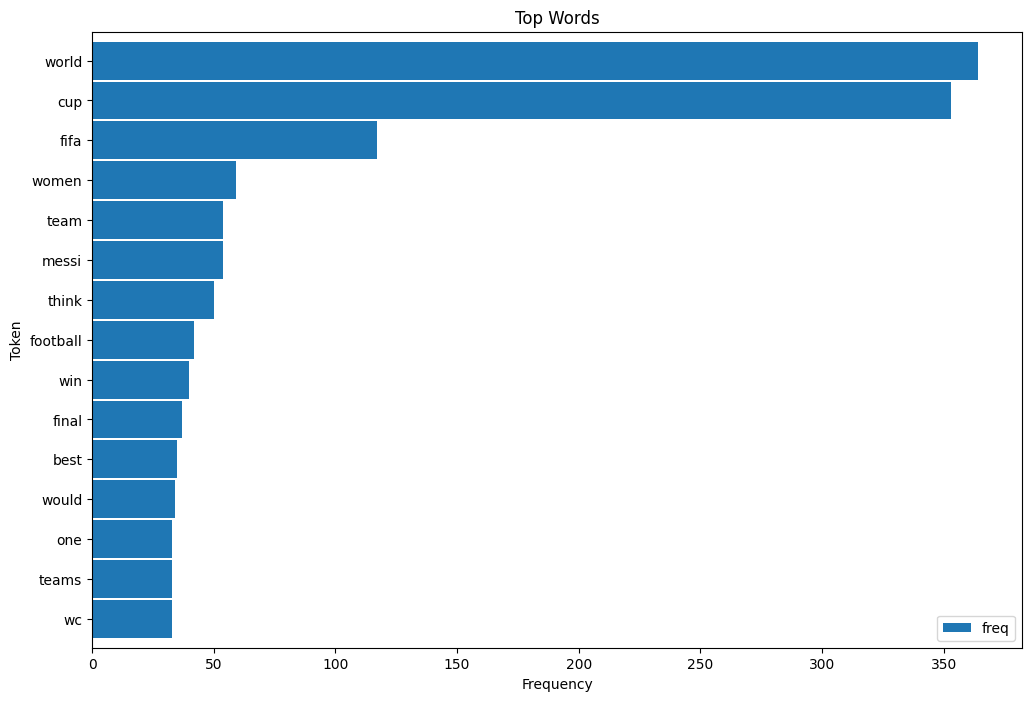

In [115]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8)) # This is done so that the bar representing the highest frequency is at the top of the chart,
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')


# word cloud installation

In [116]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# word cloud on world cup

In [123]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt


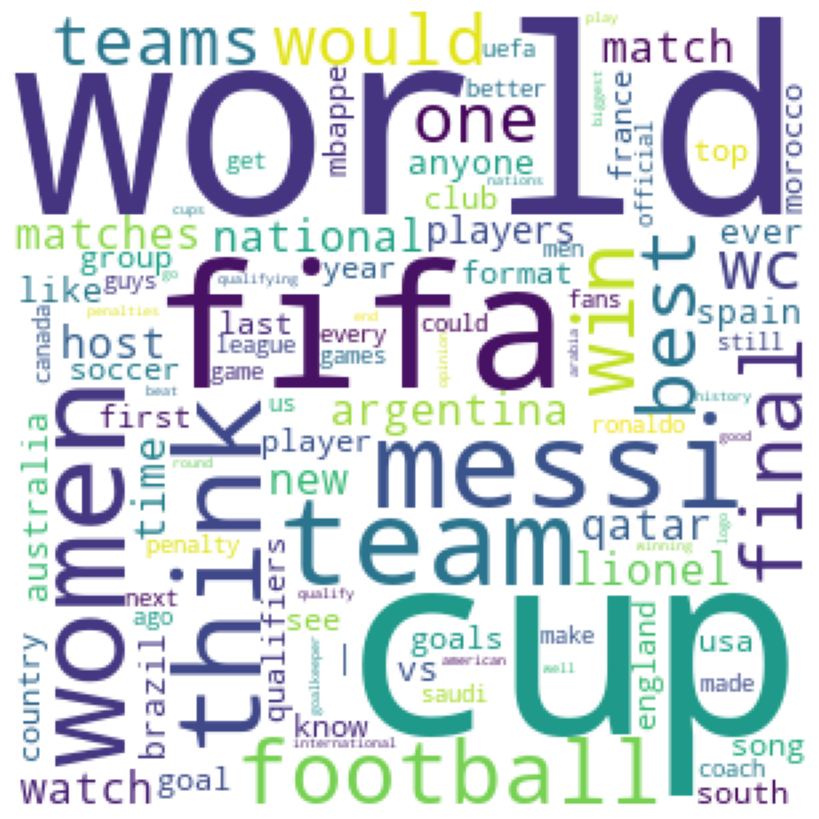

In [124]:
wc = WordCloud(background_color='white', width = 300, height=300, max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() ) # Initialize a WordCloud object with specific configurations.
# Display the generated word cloud image.
plt.figure(figsize = (8, 8), facecolor = None)
# Display the generated word cloud image.
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0) # Adjust the layout to ensure there's no clipping of content and minimize padding.
plt.show() # Display the plot with the word cloud.

#  install scikit-learn

In [125]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [126]:
#Get the Bing Liu lexicon
from sklearn import preprocessing
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\abhil\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


# creating dictionary

In [128]:
#Create the “Dictionary”
# Let's create a dictionary which we can use for scoring our review text
nltk.download('punkt')
worldcup_df.rename(columns={"reviewText": "text"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
 
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
      
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Math function

In [129]:
#Function to do the math
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score  


In [134]:
#Make sure all texts are non-empty and aretype text then call the function
worldcup_df['Titles'].fillna('no review', inplace=True)
worldcup_df['Bing_Liu_Score'] = worldcup_df['Titles'].apply(bing_liu_score)

C:\Users\abhil\AppData\Local\Temp\ipykernel_28620\4183808166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  worldcup_df['Titles'].fillna('no review', inplace=True)


# Output

In [138]:
#Let’s see the output
worldcup_df[["Titles", 'Bing_Liu_Score']].head(10)

,Titles,Bing_Liu_Score
0,Ronaldo and his family latest drama Driving on...,0
1,India should think of hosting a few matches of...,0
2,Joelinton Red Card (soft) Brazil vs Argentina ...,1
3,Does it count as the best world cup music? (un...,3
4,Who will be the next host nation to win the FI...,1
5,Pele the legend. He did it all first. Everyone...,0
6,2002 FIFA World Cup Controversy- The Biggest F...,-1
7,Discussion Best FIFA World Cup Song of All Time??,1
8,Brazil arrived at the FIFA Women's World Cup i...,0
9,What a comeback! Nigeria stun Women's World Cu...,0


In [145]:




worldcup_df.groupby('Titles').agg({'Bing_Liu_Score':'mean'})

,Bing_Liu_Score
Titles,
"""In choosing the location for the Final, [FIFA has] a critical chance to match their words with action,"" says Florida State Senator _Taddeo , urging to choose New York/New Jersey as the host for the Men's 2026 World Cup Final.",-1.0
"""Spain head coach Jorge Vilda criticises 'inappropriate' Luis Rubiales kiss"" - BBC Sport News.",0.0
"' It’s a breath of fresh air,' Bruno Fernandes disagrees with Ronaldo's claim Bruno Fernandes has d",0.0
"'Being at the next World Cup will be Messi's decision,' Lionel Scaloni Lionel Messi guided Argentin",0.0
"'I'll go year by year and we'll see,' Neymar on his 2026 WC involvement Neymar's hopes of winning h",1.0
...,...
why was FIFA's youtube channel so lazy in 2022 compared to 2018?,-1.0
‘It’s over’ World Cup kiss becomes Spanish football’s MeToo moment,0.0
‘Let’s try and win the World Cup’ Bold ambition of rising Socceroos star,1.0


In [150]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
worldcup_df["Titles"]= worldcup_df["Titles"].apply(remove_emoji)

#Show the clean text
worldcup_df.head()

,Titles,tokens,num_tokens,Bing_Liu_Score
0,Ronaldo and his family latest drama Driving on...,"[ronaldo, family, latest, drama, driving, side...",60,0
1,India should think of hosting a few matches of...,"[india, think, hosting, matches, world, cup, s...",96,0
2,Joelinton Red Card (soft) Brazil vs Argentina ...,"[joelinton, red, card, soft, brazil, vs, argen...",50,1
3,Does it count as the best world cup music? (un...,"[count, best, world, cup, music, unquestionabl...",76,3
4,Who will be the next host nation to win the FI...,"[next, host, nation, win, fifa, world, cup]",59,1


In [151]:
!pip install textblob


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [153]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
worldcup_df['Subjectivity'] = worldcup_df['Titles'].apply(getSubjectivity)
worldcup_df['Polarity'] = worldcup_df['Titles'].apply(getPolarity)

#Now display data
worldcup_df.head()

,Titles,tokens,num_tokens,Bing_Liu_Score,Subjectivity,Polarity
0,Ronaldo and his family latest drama Driving on...,"[ronaldo, family, latest, drama, driving, side...",60,0,0.900,0.625
1,India should think of hosting a few matches of...,"[india, think, hosting, matches, world, cup, s...",96,0,0.100,-0.200
2,Joelinton Red Card (soft) Brazil vs Argentina ...,"[joelinton, red, card, soft, brazil, vs, argen...",50,1,0.175,0.050
3,Does it count as the best world cup music? (un...,"[count, best, world, cup, music, unquestionabl...",76,3,0.300,1.000
4,Who will be the next host nation to win the FI...,"[next, host, nation, win, fifa, world, cup]",59,1,0.200,0.400


# Group the range of Polarity to different categories

In [154]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
worldcup_df["Insight"] = worldcup_df["Polarity"].apply(getInsight)

worldcup_df.head(50)

,Titles,tokens,num_tokens,Bing_Liu_Score,Subjectivity,Polarity,Insight
0,Ronaldo and his family latest drama Driving on...,"[ronaldo, family, latest, drama, driving, side...",60,0,0.900000,0.625000,Positive
1,India should think of hosting a few matches of...,"[india, think, hosting, matches, world, cup, s...",96,0,0.100000,-0.200000,Negative
2,Joelinton Red Card (soft) Brazil vs Argentina ...,"[joelinton, red, card, soft, brazil, vs, argen...",50,1,0.175000,0.050000,Positive
3,Does it count as the best world cup music? (un...,"[count, best, world, cup, music, unquestionabl...",76,3,0.300000,1.000000,Positive
4,Who will be the next host nation to win the FI...,"[next, host, nation, win, fifa, world, cup]",59,1,0.200000,0.400000,Positive
5,Pele the legend. He did it all first. Everyone...,"[pele, legend, first, everyone, else, followed]",60,0,0.333333,0.250000,Positive
6,2002 FIFA World Cup Controversy- The Biggest F...,"[fifa, world, cup, controversy-, biggest, fifa...",57,-1,0.000000,0.000000,Neutral
7,Discussion Best FIFA World Cup Song of All Time??,"[discussion, best, fifa, world, cup, song, time]",49,1,0.300000,1.000000,Positive
8,Brazil arrived at the FIFA Women's World Cup i...,"[brazil, arrived, fifa, women, world, cup, aus...",201,0,0.200000,-0.300000,Negative
9,What a comeback! Nigeria stun Women's World Cu...,"[comeback, nigeria, stun, women, world, cup, c...",108,0,0.450000,-0.050000,Negative


In [155]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Getting polarity and insight

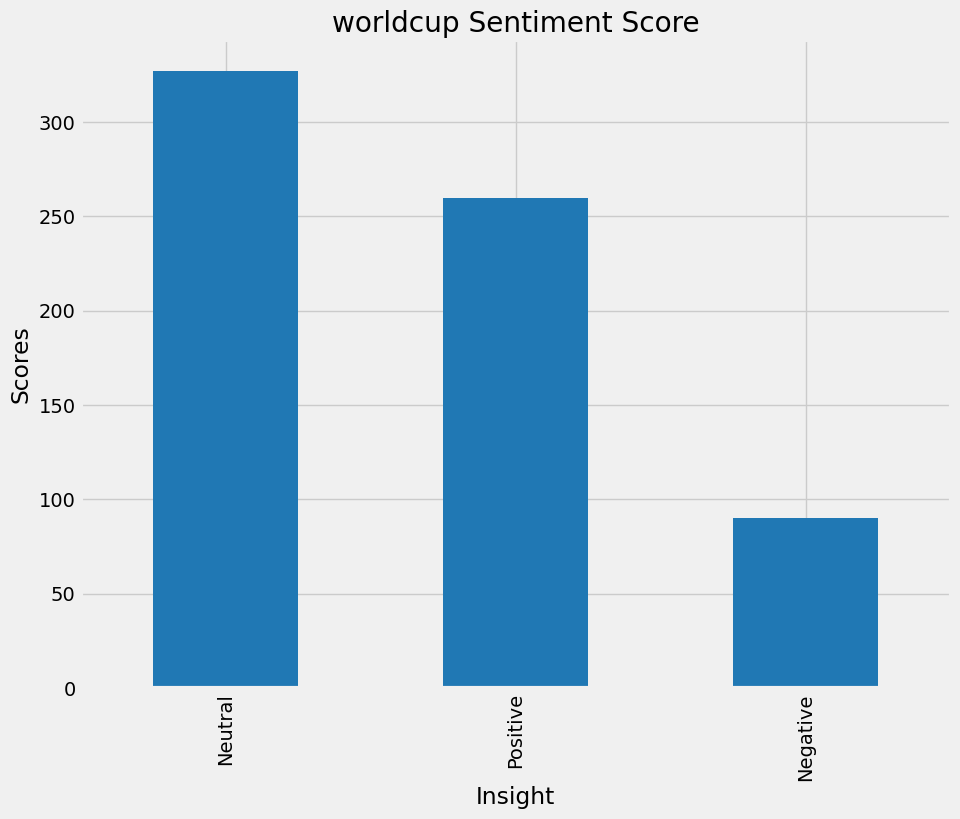

In [156]:
#Plot the values count of sentiment
plt.title("worldcup Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
worldcup_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

In [157]:
#pip install matplotlib  # Use the 'pip' package manager to install the 'matplotlib' library.
import matplotlib.pyplot as plt

# Box plot

<Figure size 800x600 with 0 Axes>

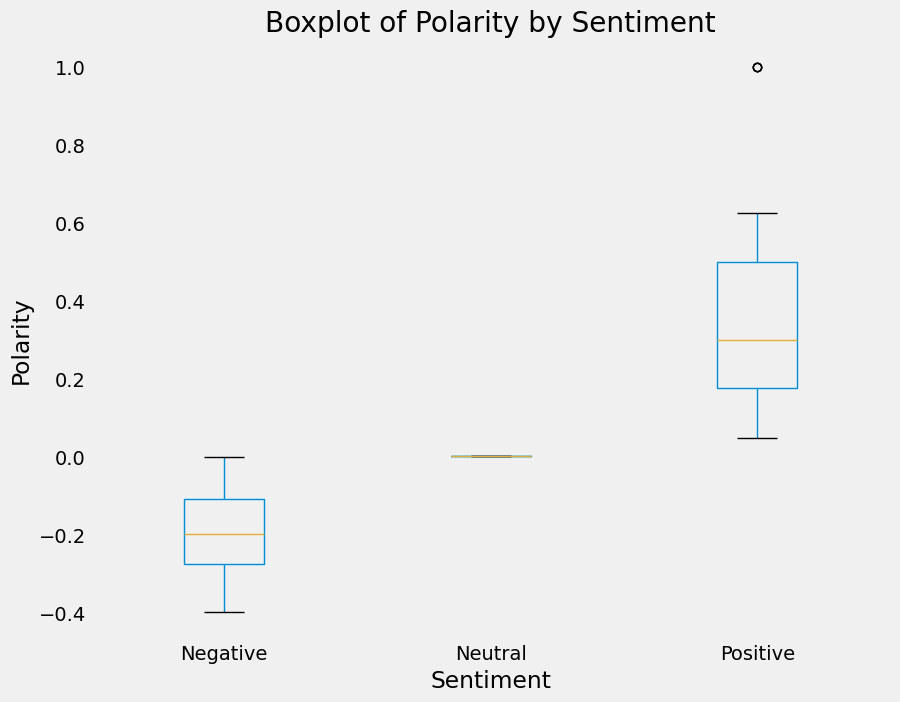

In [166]:
# Sample data
data = {
    'Sentiment': ['Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Negative', 'Negative',
                  'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive',
                  'Neutral', 'Negative', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive',
                  'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Neutral',
                  'Negative', 'Negative', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral'],
    'Polarity': [0.625, -0.2, 0.05, 1.0, 0.4, 0.25, 0.0, 1.0, -0.3, -0.05,
                 0.0, 0.066667, 0.0, 0.0, 0.047222, 0.0, 0.0, 0.1875, 0.0, 0.175,
                 0.0, -0.4, 0.3, 0.0, 0.5, 0.0, 0.25, 0.0, 0.0, 0.175,
                 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.45, -0.001587, 0.0,
                 -0.25, -0.166667, 0.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Plot boxplot
plt.figure(figsize=(8, 6))
df.boxplot(column='Polarity', by='Sentiment')
plt.title('Boxplot of Polarity by Sentiment')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Sentiment')
plt.ylabel('Polarity')
plt.grid(False)
plt.show()

# Histogram

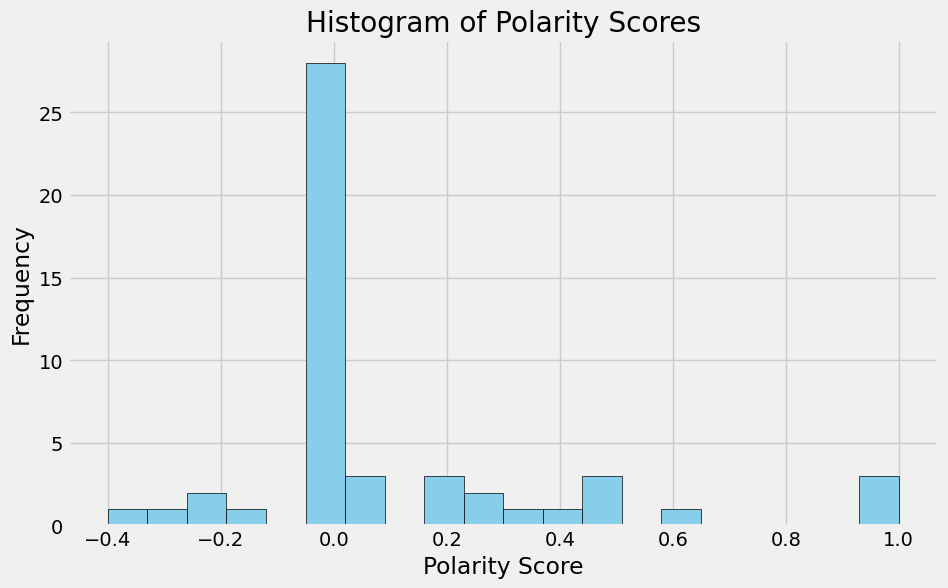

In [169]:
# Sample data for histogram
polarity_data = [0.625, -0.2, 0.05, 1.0, 0.4, 0.25, 0.0, 1.0, -0.3, -0.05,
                 0.0, 0.066667, 0.0, 0.0, 0.047222, 0.0, 0.0, 0.1875, 0.0, 0.175,
                 0.0, -0.4, 0.3, 0.0, 0.5, 0.0, 0.25, 0.0, 0.0, 0.175,
                 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.45, -0.001587, 0.0,
                 -0.25, -0.166667, 0.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(polarity_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=1)
plt.show()

# Line Plot

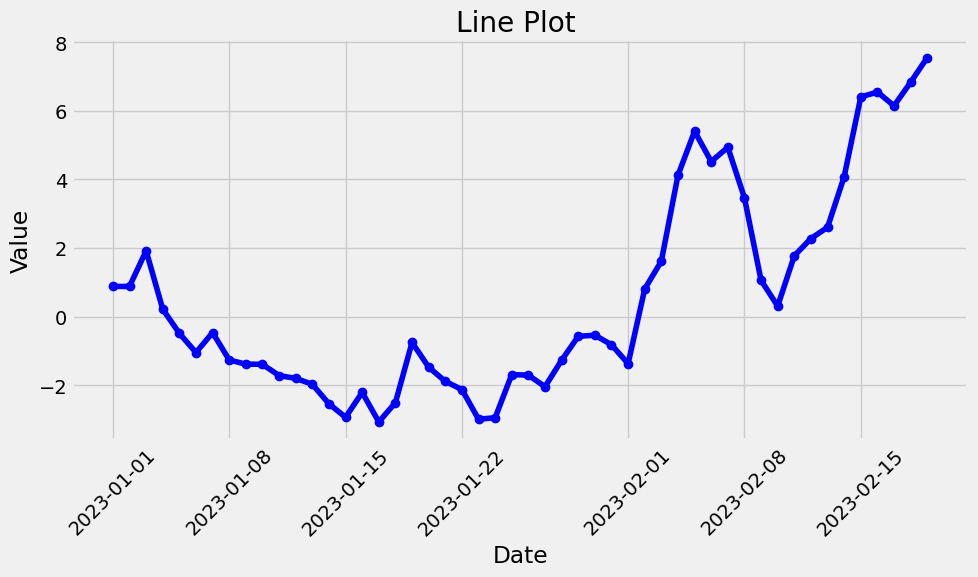

In [171]:
import numpy as np

# Simulating some data for a line plot
dates = pd.date_range('20230101', periods=50)  # Generate 50 dates starting from Jan 1, 2023
data = np.random.randn(50).cumsum()  # Generate random data and compute the cumulative sum to simulate a trend

# Creating a DataFrame
df_line = pd.DataFrame(data, index=dates, columns=['Value'])

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(df_line.index, df_line['Value'], marker='o', linestyle='-', color='blue')
plt.title('Line Plot ')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


# Regex fuction in our day to day Life

## email , date , phone ,url , ip address

In [172]:
import re

# Sample strings containing the patterns
email_example = "Please contact us at support@example.com for further assistance."
date_example = "The report was published on 12/25/2021 and updated on 01/05/2022."
phone_example = "For more information, call 123-456-7890 or visit our website."
url_example = "Check out our website at https://www.example.com for more details."
ip_example = "The server with IP address 192.168.1.1 responded in 4 ms."

# Regex patterns
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
date_pattern = r'\b\d{2}/\d{2}/\d{4}\b'
phone_pattern = r'\b\d{3}[-.]\d{3}[-.]\d{4}\b'
url_pattern = r'https?://(?:www\.)?\S+(?:/|\b)'
ip_pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'

# Extracting and printing matches
print("Email:", re.findall(email_pattern, email_example))
print("Date:", re.findall(date_pattern, date_example))
print("Phone:", re.findall(phone_pattern, phone_example))
print("URL:", re.findall(url_pattern, url_example))
print("IP:", re.findall(ip_pattern, ip_example))


Email: ['support@example.com']
Date: ['12/25/2021', '01/05/2022']
Phone: ['123-456-7890']
URL: ['https://www.example.com']
IP: ['192.168.1.1']
